# Import dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:01<00:00, 1.54MB/s]

Extracting files...
Path to dataset files: C:\Users\Tran Quang Minh\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [4]:
import pandas as pd

In [5]:
books = pd.read_csv(f"{path}/books.csv")
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


# Exploratory Data Analysis

### Explore the dataset

In [9]:
def explore_dataset(df):
    """
    Explores a pandas DataFrame by providing key information and statistics.

    Args:
        df (pd.DataFrame): The DataFrame to explore
    """
    if not isinstance(df, pd.DataFrame):
        print("Error: Input must be a pandas DataFrame.")
        return
    
    print("Dataset Exploration:")
    print("-" * 80)

    # Basic information
    print("\nBasic Information:")
    print(f"Shape (Rows, Columns): {df.shape}")
    print(f"Data Types:\n{df.dtypes}")
    print(f"Memory Usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

    # Missing Values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # Descriptive Statistics
    print("\nDescriptive Statistics (Numberic Columns):")
    print(df.describe())

    # Descriptive Statistics (Categorical Columns)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if not categorical_cols.empty:
        print("\nDescriptive Statistics (Categorical Columns):")
        print(df[categorical_cols].describe())
        for col in categorical_cols:
            print(f"\nValue Counts for {col}:\n{df[col].value_counts()}")

    # Display the first few rows
    print("\nFirst 5 rows")
    print(df.head())

    # Unique Values
    print("\nUnique Values per Column:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()}")

explore_dataset(df=books)

Dataset Exploration:
--------------------------------------------------------------------------------

Basic Information:
Shape (Rows, Columns): (6810, 12)
Data Types:
isbn13              int64
isbn10             object
title              object
subtitle           object
authors            object
categories         object
thumbnail          object
description        object
published_year    float64
average_rating    float64
num_pages         float64
ratings_count     float64
dtype: object
Memory Usage: 0.62 MB

Missing Values:
isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

Descriptive Statistics (Numberic Columns):
             isbn13  published_year  average_rating    num_pages  \
count  6.810000e+03     6804.000000     6767.000000  6767.000000  

### Check duplicates

In [12]:
def check_duplicate_rows(df):
    """
    Checks for and reports duplicate rows in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to check.
    """

    if not isinstance(df, pd.DataFrame):
        print("Error: Input must be a pandas DataFrame")
        return

    duplicates = df.duplicated()
    num_duplicates = duplicates.sum()

    if num_duplicates == 0:
        print("No duplicate rows found.")
    else:
        print(f"Found {num_duplicates} duplicates rows.")
        print("Duplicate Rows:")
        print(df[duplicates])

check_duplicate_rows(df=books)

No duplicate rows found.


### Check column distributions

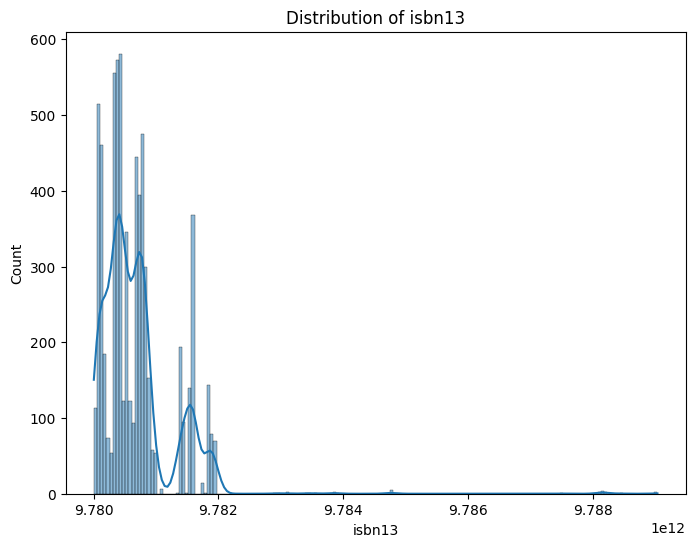

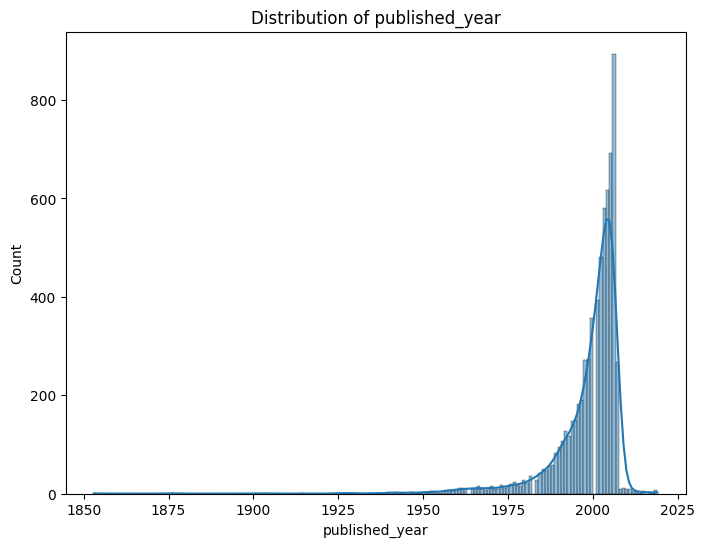

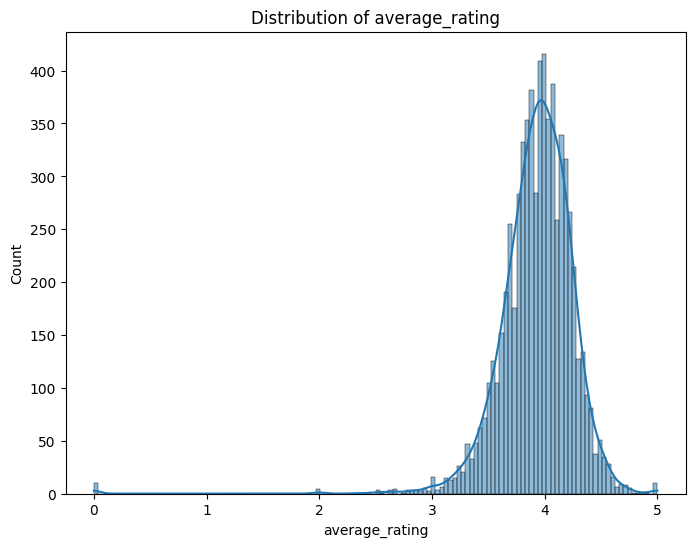

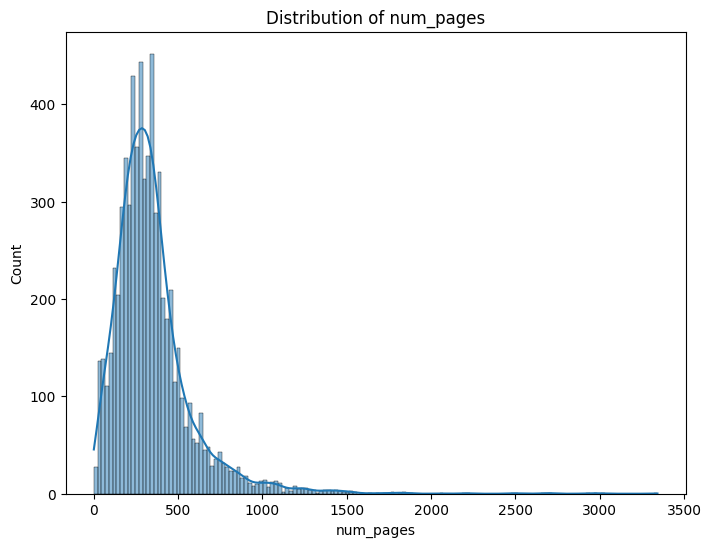

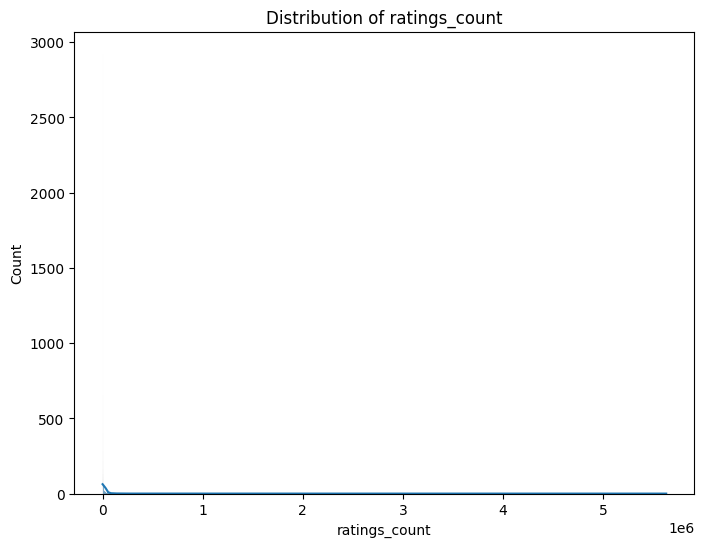

In [14]:
def explore_column_distributions(df, numeric_cols=None):
    """
    Explores the distributions of numeric and categorical using histograms

    Args:
        df (pd.DataFrame): The DataFrame to explore
        numeric_cols (list, optional): List of numeric columns to plot. If None, all numeric columns are used.
    """

    import matplotlib.pyplot as plt
    import seaborn as sns

    if not isinstance(df, pd.DataFrame):
        print("Error: Input must be a pandas DataFrame.")
        return
    
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns


    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

explore_column_distributions(df=books)
    